# Data_Preprocessing_Operations_in_Python
In this section, you can see a summary of the operations related to data preprocessing in python.

<hr />

## Aykırı Değer Problimini Çözmek

* **Tek Değişkenli Aykırı Gözlem Analizi**

  1) Silmek

  2) Ortalama ile Doldurmak

  3) Baskılamak

* **Çok Değişkenli Aykırı Gözlem Analizi**

  1) Silmek

  2) Baskılamak

## Eksik Veri Analizi

* **Eksik Veri Yapısı için Hızlı Çözüm**

  1) Silmek

  2) Değer Atamak

* **Eksik Veri Yapısının Görselleştirilmesi**

* **Silme Yöntemleri**

* **Değer Atamak Yöntemleri**

  1) Sayısal Değişkenlerde Atama

  2) Kategorik Değişkenlerde Atama

* **Tahmine Dayalı Değer Atama Yöntemleri**

  1) KNN

  2) EM

## Standardizasyon ve Dönüşüm İşlemleri 

* **Değişken Standardizasyonu**

  1) Standardizasyon

  2) Normilazsyon

  3) Min-Max Dönüşümü

* **Değişken Dönüşümü**

  1) Binarize Dönüşümü

  2) 0-1 Dönüşümü

  3) "1" ve diğerleri "0" dönüşümü

  4) Çok sınıflı dönüşüm

* **One-Hot Dönüşümü**

* **Sürekli Değişkeni Kategorik Değişkene Çevirmek**

* **Değişkeni İndexe, İndexi Değişkene Çevrimek**

<hr />


# Aykırı Değer Problimini Çözmek

* **Tek Değişkenli Aykırı Gözlem Analizi**

  1) Silmek

  2) Ortalama ile Doldurmak

  3) Baskılamak

* **Çok Değişkenli Aykırı Gözlem Analizi**

  1) Silmek

  2) Baskılamak

In [ ]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["int64","float64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


## Tek Değişkenli Aykırı Gözlem Analizi


In [ ]:
# Silmek
def outlier_thresholds(dataframe,variable):
  Q1 = dataframe[variable].quantile(0.25)
  Q3 = dataframe[variable].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - 1.5 * IQR
  up_limit = Q3 + 1.5 * IQR
  return low_limit, up_limit

def remove_outlier(dataframe,variable):
  low_limit, up_limit = outlier_thresholds(dataframe,variable)
  dataframe = dataframe.loc[~((dataframe[variable] < low_limit) | (dataframe[variable] > up_limit))]
  return dataframe

In [ ]:
remove_outlier(df,"table")

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Ortalama ile Doldurmak
def outlier_thresholds(dataframe,variable):
  Q1 = dataframe[variable].quantile(0.25)
  Q3 = dataframe[variable].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - 1.5 * IQR
  up_limit = Q3 + 1.5 * IQR
  return low_limit, up_limit

def fill_with_average_outlier(dataframe,variable):
  low_limit, up_limit = outlier_thresholds(dataframe,variable)
  dataframe.loc[((dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)),variable] = dataframe[variable].mean()

In [ ]:
fill_with_average_outlier(df,"table")

In [ ]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.000000,326,3.95,3.98,2.43
1,0.21,59.8,61.000000,326,3.89,3.84,2.31
2,0.23,56.9,57.457184,327,4.05,4.07,2.31
3,0.29,62.4,58.000000,334,4.20,4.23,2.63
4,0.31,63.3,58.000000,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.000000,2757,5.75,5.76,3.50
53936,0.72,63.1,55.000000,2757,5.69,5.75,3.61
53937,0.70,62.8,60.000000,2757,5.66,5.68,3.56
53938,0.86,61.0,58.000000,2757,6.15,6.12,3.74


In [ ]:
# Baskılamak
def outlier_thresholds(dataframe,variable):
  Q1 = dataframe[variable].quantile(0.25)
  Q3 = dataframe[variable].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - 1.5 * IQR
  up_limit = Q3 + 1.5 * IQR
  return low_limit, up_limit

def replace_with_thresholds(dataframe,variable):
  low_limit, up_limit = outlier_thresholds(dataframe,variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
replace_with_thresholds(df,"table")

In [ ]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,63.5,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


## Çok Değişkenli Aykırı Gözlem Analizi

In [ ]:
# Silmek
def remove_all_outlier(dataframe,n_neighbors=20,contamination=0.1, threshold_number=13):
  import numpy as np
  from sklearn.neighbors import LocalOutlierFactor
  clf = LocalOutlierFactor(n_neighbors=n_neighbors,contamination=contamination)
  clf.fit_predict(dataframe)
  df_scores = clf.negative_outlier_factor_
  threshold_value = np.sort(df_scores)[threshold_number]
  dataframe = dataframe.loc[df_scores > threshold_value]
  return dataframe

In [ ]:
remove_all_outlier(df)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Baskılamak
def replace_all_with_thresholds(dataframe,n_neighbors=20,contamination=0.1,threshold_number=13):
  import numpy as np
  import pandas as pd
  from sklearn.neighbors import LocalOutlierFactor
  clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
  clf.fit_predict(dataframe)
  df_scores = clf.negative_outlier_factor_
  threshold_value = np.sort(df_scores)[threshold_number]
  threshold_row = dataframe[df_scores == threshold_value]
  no_outlier_df = df_scores > threshold_value
  outliers = dataframe[~no_outlier_df]
  res  = outliers.to_records(index=False)
  res[:] = threshold_row.to_records(index=False)
  dataframe[~no_outlier_df] = pd.DataFrame(res, index=dataframe[~no_outlier_df].index)
  return dataframe[~no_outlier_df]

In [ ]:
replace_all_with_thresholds(df)

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


# Eksik Veri Analizi

* **Eksik Veri Yapısı için Hızlı Çözüm**

  1) Silmek

  2) Değer Atamak

* **Eksik Veri Yapısının Görselleştirilmesi**

* **Silme Yöntemleri**

* **Değer Atamak Yöntemleri**

  1) Sayısal Değişkenlerde Atama

  2) Kategorik Değişkenlerde Atama

* **Tahmine Dayalı Değer Atama Yöntemleri**

  1) KNN

  2) EM

In [ ]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df = df.select_dtypes(include = ["int64","float64"])
df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [ ]:
df.isnull().sum()

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,number,orbital_period,mass,distance,year
7,1,798.500000,NaN,21.41,1996
20,5,0.736540,NaN,12.53,2011
25,1,116.688400,NaN,18.11,1996
26,1,691.900000,NaN,81.50,2012
29,1,NaN,NaN,45.52,2005
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


In [ ]:
df[df.notnull().all(axis=1)]

,number,orbital_period,mass,distance,year
0,1,269.30000,7.100,77.40,2006
1,1,874.77400,2.210,56.95,2008
2,1,763.00000,2.600,19.84,2011
3,1,326.03000,19.400,110.62,2007
4,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...
640,1,111.70000,2.100,14.90,2009
641,1,5.05050,1.068,44.46,2013
642,1,311.28800,1.940,17.24,1999
649,1,2.70339,1.470,178.00,2013


## Eksik Veri için Hızlı Çözüm

In [ ]:
# Silmek
df.dropna(inplace=True)

In [ ]:
# Değer Atamak
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


## Eksik Veri Yapısının Görselleştirilmesi

In [ ]:
!pip install missingno

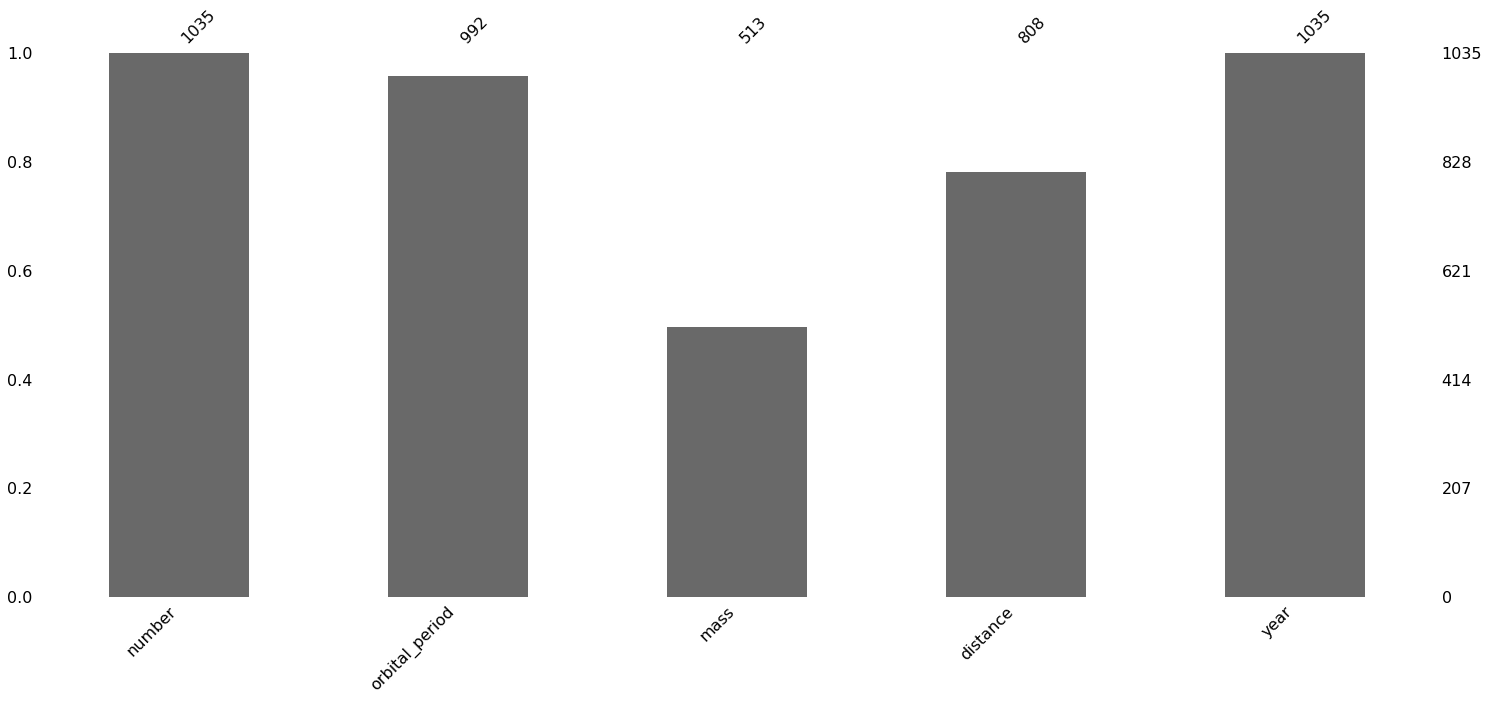

In [ ]:
import missingno as msno
msno.bar(df);

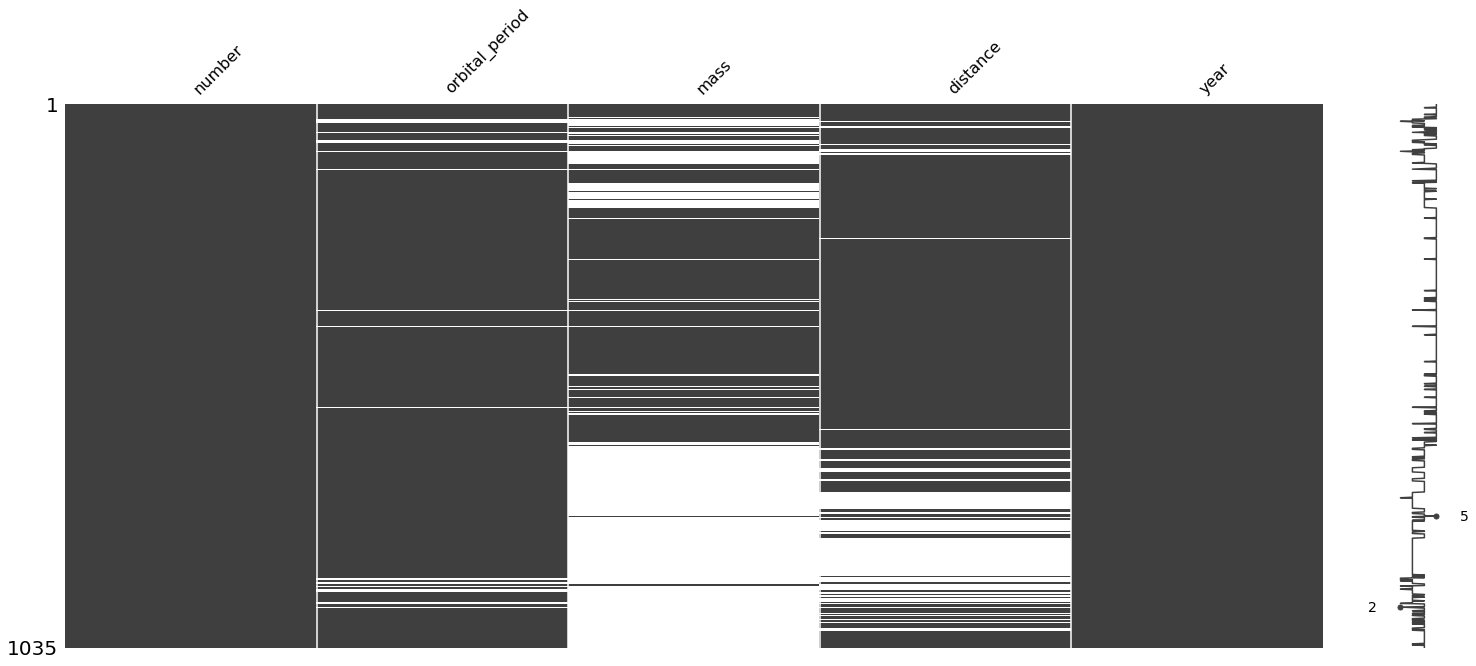

In [ ]:
msno.matrix(df);

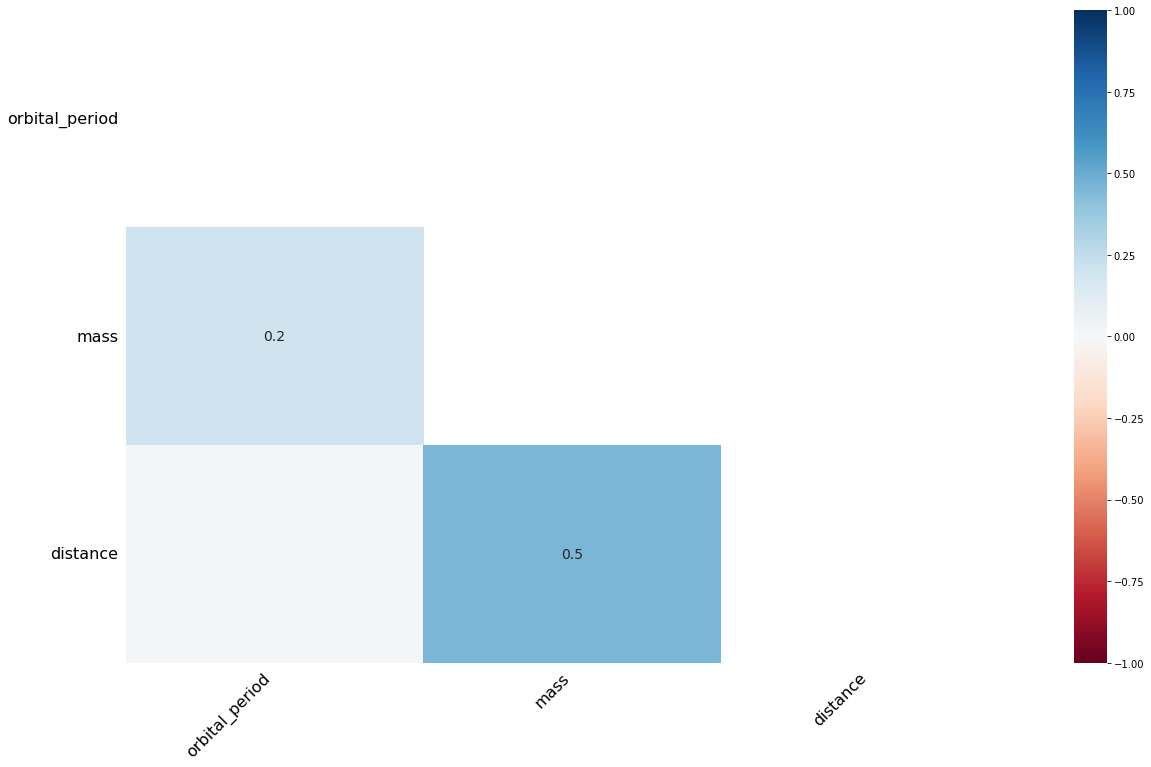

In [ ]:
msno.heatmap(df);

## Silme Yöntemleri

In [ ]:
df.dropna()

,number,orbital_period,mass,distance,year
0,1,269.30000,7.100,77.40,2006
1,1,874.77400,2.210,56.95,2008
2,1,763.00000,2.600,19.84,2011
3,1,326.03000,19.400,110.62,2007
4,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...
640,1,111.70000,2.100,14.90,2009
641,1,5.05050,1.068,44.46,2013
642,1,311.28800,1.940,17.24,1999
649,1,2.70339,1.470,178.00,2013


In [ ]:
df.dropna(how="all")

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


## Değer Atamak Yöntemleri

* **Sayısal Değişkenlerde Atama**

In [ ]:
# birinci yol
df.apply(lambda x: x.fillna(df.mean()),axis=0)

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


In [ ]:
# ikinci yol
df.fillna(df.mean()[:])

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


In [ ]:
# üçüncü yol
import pandas as pd
df.where(pd.notna(df),df.mean(),axis="columns")

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


## Değer Atamak Yöntemleri

* **Kategorik Değişkenlerde Atama**

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([5,np.NaN,10,14,np.NaN,12,6,np.NaN,10])
V2 = np.array([7,np.NaN,11,5,np.NaN,7,10,14,20])
V3 = np.array([np.NaN,8,10,10,12,10,7,np.NaN,11])
V4 = np.array(["IT","IK","IT","IK","IT","IK","IK","IT","IK"])
df = pd.DataFrame({'maas':V1, 'V2':V2, 'V3':V3, 'departman': V4})
df

,maas,V2,V3,departman
0,5.0,7.0,NaN,IT
1,NaN,NaN,8.0,IK
2,10.0,11.0,10.0,IT
3,14.0,5.0,10.0,IK
4,NaN,NaN,12.0,IT
5,12.0,7.0,10.0,IK
6,6.0,10.0,7.0,IK
7,NaN,14.0,NaN,IT
8,10.0,20.0,11.0,IK


In [ ]:
# kategorik değişken kırılımında değer atama
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     5.0
1    10.5
2    10.0
3    14.0
4     7.5
5    12.0
6     6.0
7     7.5
8    10.0
Name: maas, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([5,np.NaN,10,14,np.NaN,12,6,np.NaN,10])
V2 = np.array(["IT","IK",np.nan,"IK","IT","IK","IK","IT","IK"],dtype="object")
df = pd.DataFrame({'maas':V1, 'departman': V2})
df

,maas,departman
0,5.0,IT
1,NaN,IK
2,10.0,NaN
3,14.0,IK
4,NaN,IT
5,12.0,IK
6,6.0,IK
7,NaN,IT
8,10.0,IK


In [ ]:
# mode ile doldurmak
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IT
5    IK
6    IK
7    IT
8    IK
Name: departman, dtype: object

In [ ]:
# sonraki değer ile doldurmak
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IT
5    IK
6    IK
7    IT
8    IK
Name: departman, dtype: object

In [ ]:
# önceki değer ile doldurmak
df["departman"].fillna(method = "ffill")

0    IT
1    IK
2    IK
3    IK
4    IT
5    IK
6    IK
7    IT
8    IK
Name: departman, dtype: object

## Tahmine Dayalı Değer Atama Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("titanic")
df = df.select_dtypes(include=["int64","float64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
!pip install ycimpute

In [ ]:
# KNN
from ycimpute.imputer import knnimput
var_names = list(df)
n_df  = np.array(df)
dff = knnimput.KNN(k=4).complete(n_df)
dff = pd.DataFrame(dff, columns=var_names)
dff.isnull().sum()

Imputing row 1/891 with 0 missing, elapsed time: 0.232
Imputing row 101/891 with 0 missing, elapsed time: 0.234
Imputing row 201/891 with 0 missing, elapsed time: 0.236
Imputing row 301/891 with 1 missing, elapsed time: 0.238
Imputing row 401/891 with 0 missing, elapsed time: 0.240
Imputing row 501/891 with 0 missing, elapsed time: 0.242
Imputing row 601/891 with 0 missing, elapsed time: 0.251
Imputing row 701/891 with 0 missing, elapsed time: 0.260
Imputing row 801/891 with 0 missing, elapsed time: 0.262


survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
# EM
from ycimpute.imputer import EM
var_names = list(df)
n_df = np.array(df)
dff = EM().complete(n_df)
dff = pd.DataFrame(dff, columns=var_names)
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# Standardizasyon ve Dönüşüm İşlemleri 

* **Değişken Standardizasyonu**

  1) Standardizasyon

  2) Normilazsyon

  3) Min-Max Dönüşümü

* **Değişken Dönüşümü**

  1) Binarize Dönüşümü

  2) 0-1 Dönüşümü

  3) "1" ve diğerleri "0" dönüşümü

  4) Çok sınıflı dönüşüm

* **One-Hot Dönüşümü**

* **Sürekli Değişkeni Kategorik Değişkene Çevirmek**

* **Değişkeni İndexe, İndexi Değişkene Çevrimek**

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([5,10,10,14,17,12,6,20,10])
V2 = np.array([7,1,11,5,22,7,10,14,20])
V3 = np.array([20,8,10,10,12,10,7,19,11])
df = pd.DataFrame({'V1':V1, 'V2':V2, 'V3':V3})
df.head()

,V1,V2,V3
0,5,7,20
1,10,1,8
2,10,11,10
3,14,5,10
4,17,22,12


* **Değişken Standardizasyonu**

In [ ]:
# Standardizasyon
from sklearn import preprocessing
preprocessing.scale(df)

array([[-1.43349212, -0.58172802,  1.88359658],
       [-0.34015067, -1.505649  , -0.90309425],
       [-0.34015067,  0.0342193 , -0.43864578],
       [ 0.53452248, -0.88970168, -0.43864578],
       [ 1.19052735,  1.72807442,  0.02580269],
       [ 0.09718591, -0.58172802, -0.43864578],
       [-1.21482383, -0.11976753, -1.13531849],
       [ 1.84653222,  0.49617979,  1.65137235],
       [-0.34015067,  1.42010076, -0.20642154]])

In [ ]:
# Normalizayon
from sklearn import preprocessing
preprocessing.normalize(df)

array([[0.22965761, 0.32152065, 0.91863042],
       [0.77849894, 0.07784989, 0.62279916],
       [0.55814557, 0.61396013, 0.55814557],
       [0.7814038 , 0.27907279, 0.55814557],
       [0.56138946, 0.72650401, 0.39627491],
       [0.70104749, 0.40894437, 0.58420624],
       [0.44112877, 0.73521462, 0.51465024],
       [0.64650818, 0.45255573, 0.61418277],
       [0.40128618, 0.80257235, 0.44141479]])

In [ ]:
# Min-Max Dönüşümü
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(1,30))
scaler.fit_transform(df)

array([[ 1.        ,  9.28571429, 30.        ],
       [10.66666667,  1.        ,  3.23076923],
       [10.66666667, 14.80952381,  7.69230769],
       [18.4       ,  6.52380952,  7.69230769],
       [24.2       , 30.        , 12.15384615],
       [14.53333333,  9.28571429,  7.69230769],
       [ 2.93333333, 13.42857143,  1.        ],
       [30.        , 18.95238095, 27.76923077],
       [10.66666667, 27.23809524,  9.92307692]])

* **Değişken Dönüşümü**


In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([5,10,10,14,17,12,6,20,10])
V2 = np.array([7,1,11,5,22,7,10,14,20])
V3 = np.array([20,8,10,10,12,10,7,19,11])
df = pd.DataFrame({'V1':V1, 'V2':V2, 'V3':V3})
df.head()

,V1,V2,V3
0,5,7,20
1,10,1,8
2,10,11,10
3,14,5,10
4,17,22,12


In [ ]:
# Binarize Dönüşümü
from sklearn import preprocessing
binarizer = preprocessing.Binarizer(threshold=7).fit(df)
binarizer.transform(df)

array([[0, 0, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1]])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 0-1 Dönüşümü : df["sex"].cat.codes koduda kullanılabilir
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
#  "1" ve diğerleri "0" dönüşümü
import numpy as np
np.where(df["day"].str.contains("Sun"),1,0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# çok sınıflı dönüşüm
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

* **One-Hot Dönüşümü**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# One-Hot Dönüşümü
import pandas as pd
pd.get_dummies(df, columns=["day"], prefix=["day"])

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,0,0,1,0


* **Sürekli Değişkeni Kategorik Değişkene Çevirmek**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("tips")
df = df.select_dtypes(include=["int64","float64"])
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [5]:
# Sürekli Değişkeni Kategorik Değişkene Çevirmek
from sklearn import preprocessing
est = preprocessing.KBinsDiscretizer(n_bins=[3,2,2], encode="ordinal", strategy="quantile").fit(df)
est.transform(df)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

* **Değişkeni İndexe, İndexi Değişkene Çevrimek**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Değişkeni İndexe Çevrimek
df["new_variable"] = df.index
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_variable
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [12]:
# İndexi Değişkene Çevrimek
df.index = df["new_variable"] + 10
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='new_variable', length=244)